In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve


# 데이터 로드
train = pd.read_csv(r'C:\Users\user\Downloads\kuggle_train.csv')
test = pd.read_csv(r'C:\Users\user\Downloads\kuggle_test.csv')

In [180]:
train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,is_canceled
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,Transient,0.00,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,Transient,0.00,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,Transient,75.00,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0
3,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,Transient,98.00,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,Transient,98.00,0,1,Check-Out,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95506,City Hotel,23,2017,August,35,30,2,5,2,0.0,...,Transient,96.14,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,0
95507,City Hotel,102,2017,August,35,31,2,5,3,0.0,...,Transient,225.43,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,0
95508,City Hotel,34,2017,August,35,31,2,5,2,0.0,...,Transient,157.71,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,0
95509,City Hotel,109,2017,August,35,31,2,5,2,0.0,...,Transient,104.40,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,0


In [181]:
test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card
0,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.00,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
1,Resort Hotel,9,2015,July,27,1,0,2,2,0.0,...,0,Transient,103.00,0,1,Check-Out,William Velez,Velez_William@mail.com,286-669-4333,************8729
2,Resort Hotel,35,2015,July,27,1,0,4,2,0.0,...,0,Transient,145.00,0,0,Check-Out,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450
3,Resort Hotel,18,2015,July,27,1,0,4,2,1.0,...,0,Transient,154.77,0,1,Check-Out,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767
4,Resort Hotel,37,2015,July,27,1,0,4,2,0.0,...,0,Contract,97.50,0,0,Check-Out,Dr. Victor Martin,Dr.Martin@xfinity.com,331-430-8824,************6279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23874,City Hotel,198,2017,August,35,29,1,5,2,0.0,...,0,Transient,119.17,0,2,Check-Out,Mia Bridges,Bridges.Mia@xfinity.com,656-064-3564,************7590
23875,City Hotel,212,2017,August,35,28,2,5,2,0.0,...,0,Transient,92.17,0,2,Check-Out,Thomas Richardson,ThomasRichardson@verizon.com,530-787-9244,************5743
23876,City Hotel,210,2017,August,35,28,2,5,2,0.0,...,0,Transient,85.59,0,1,Check-Out,Emily Melton,Melton.Emily@verizon.com,176-506-4986,************8565
23877,City Hotel,212,2017,August,35,28,2,5,2,0.0,...,0,Transient,85.59,0,0,Check-Out,Christopher Lewis,Lewis.Christopher82@yahoo.com,302-081-9660,************3901


In [182]:
print(train.shape)
print(test.shape)

(95511, 35)
(23879, 34)


## 결측치찾기

In [183]:
train.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             386
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13117
company                           90082
days_in_waiting_list                  0


In [184]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95511 entries, 0 to 95510
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95511 non-null  object 
 1   lead_time                       95511 non-null  int64  
 2   arrival_date_year               95511 non-null  int64  
 3   arrival_date_month              95511 non-null  object 
 4   arrival_date_week_number        95511 non-null  int64  
 5   arrival_date_day_of_month       95511 non-null  int64  
 6   stays_in_weekend_nights         95511 non-null  int64  
 7   stays_in_week_nights            95511 non-null  int64  
 8   adults                          95511 non-null  int64  
 9   children                        95507 non-null  float64
 10  babies                          95511 non-null  int64  
 11  meal                            95511 non-null  object 
 12  country                         

In [185]:
test.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             102
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3223
company                           22511
days_in_waiting_list                  0


In [186]:
train["country"].value_counts() 

PRT    38818
GBR     9681
FRA     8350
ESP     6900
DEU     5790
       ...  
UMI        1
DJI        1
CYM        1
HND        1
BDI        1
Name: country, Length: 172, dtype: int64

# 결측치 처리 방법
## country : 386개, 유럽과 유럽 아닌 곳으로 나누기 -> 상위 8개국이 유럽(country2로 새로운 변수 생성, country는 삭제할 것)
## children : 4개 0으로 대체
## agent : 평균값으로 대체
## company : 결측치 너무 많아서 삭제

In [187]:
train['children'].fillna(0, inplace = True) # test는 children 결측치 없다.

In [188]:
train['agent'].fillna(train['agent'].mean(), inplace = True)
test['agent'].fillna(test['agent'].mean(), inplace = True)

In [189]:
train= train.drop(['company'],axis=1)
test = test.drop(['company'],axis=1)

# 이상치 제거
## 1. adr 가장 큰 값 5400을 뺀 평균으로 바꿔주기
## 2. adults 10이 넘는 값 평균으로 바꿔주기

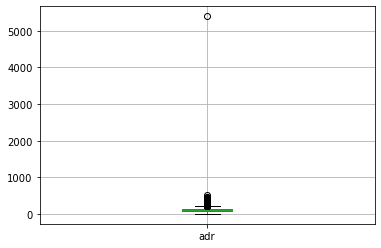

In [190]:
import matplotlib.pyplot as plt
boxplot=train.boxplot(column=['adr']) # 5000넘는 값 제거

In [191]:
max(train['adr']) #평균으로 바꿔주기 
(sum(train['adr'])-5400) / 95510

101.72867186681555

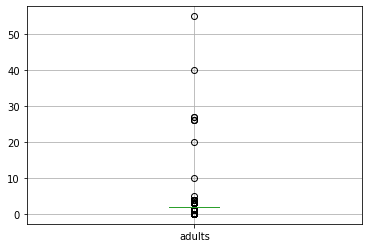

In [192]:
boxplot=train.boxplot(column=['adults']) # 10이 넘는게 6개라서 평균으로 바꿔주기

In [193]:
train['adr']=train['adr'].replace(5400,101.728)
train['adults']=train['adults'].replace(55,1.8)
train['adults']=train['adults'].replace(40,1.8)
train['adults']=train['adults'].replace(27,1.8)
train['adults']=train['adults'].replace(26,1.8)
train['adults']=train['adults'].replace(20,1.8)
train['adults']=train['adults'].replace(10,1.8)

# 새로운 변수 만들기
## 1. 성인의수, 미자의수, 아이의 수 세개를 합쳐서 "사람 수" 변수를 새로 생성한다.
## 2. 예약한 룸과 실제 배정된 룸이 일치하면 0, 일치하지 않으면 1로 표시하는 변수를 새로 생성한다.

In [194]:
#1.
train['people']=train['adults']+train['children']+train['babies']
train
test['people']=test['adults']+test['children']+test['babies']
test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,people
0,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,Transient,75.00,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1.0
1,Resort Hotel,9,2015,July,27,1,0,2,2,0.0,...,Transient,103.00,0,1,Check-Out,William Velez,Velez_William@mail.com,286-669-4333,************8729,2.0
2,Resort Hotel,35,2015,July,27,1,0,4,2,0.0,...,Transient,145.00,0,0,Check-Out,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,2.0
3,Resort Hotel,18,2015,July,27,1,0,4,2,1.0,...,Transient,154.77,0,1,Check-Out,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,3.0
4,Resort Hotel,37,2015,July,27,1,0,4,2,0.0,...,Contract,97.50,0,0,Check-Out,Dr. Victor Martin,Dr.Martin@xfinity.com,331-430-8824,************6279,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23874,City Hotel,198,2017,August,35,29,1,5,2,0.0,...,Transient,119.17,0,2,Check-Out,Mia Bridges,Bridges.Mia@xfinity.com,656-064-3564,************7590,2.0
23875,City Hotel,212,2017,August,35,28,2,5,2,0.0,...,Transient,92.17,0,2,Check-Out,Thomas Richardson,ThomasRichardson@verizon.com,530-787-9244,************5743,2.0
23876,City Hotel,210,2017,August,35,28,2,5,2,0.0,...,Transient,85.59,0,1,Check-Out,Emily Melton,Melton.Emily@verizon.com,176-506-4986,************8565,2.0
23877,City Hotel,212,2017,August,35,28,2,5,2,0.0,...,Transient,85.59,0,0,Check-Out,Christopher Lewis,Lewis.Christopher82@yahoo.com,302-081-9660,************3901,2.0


### 아래 코드 실행 오래걸림..

In [195]:
#2. 
train['room']=-1000 # 처음에 아무거나 설정해줘야함
for i in range(len(train)):
    if train.loc[i,'assigned_room_type']!=train.loc[i,'reserved_room_type']:
        train.iloc[i,-1]=1
    else:
        train.iloc[i,-1]=0
      
test['room']=-1000
for i in range(len(test)):
    if test.loc[i,'assigned_room_type']!=test.loc[i,'reserved_room_type']:
        test.iloc[i,-1]=1
    else:
        test.iloc[i,-1]=0

In [196]:
train['reservation_status'].value_counts()

Check-Out    60132
Canceled     34420
No-Show        959
Name: reservation_status, dtype: int64

In [197]:
test['reservation_status'].value_counts()

Check-Out    15034
Canceled      8597
No-Show        248
Name: reservation_status, dtype: int64

# Encoding
## hotel : labelencoding
## arrival month : one_hot인코딩 - 1~12월까지 다 있음 column수 변함없음
## meal : 삭제
## country : 유럽, 유럽 아닌 애들로 묶은 다음에 labelencoding (원래 있던 country는 삭제함)
## reserved_room_type : one_hot인코딩 
## assigned_room_type : one_hot인코딩
## deposit_type : one_hot인코딩
## customer_type : one_hot인코딩
## market_segment :one_hot인코딩
## distribution_channel :one_hot인코딩
## reservation_status : one_hot인코딩

## 원핫인코딩을 하기 전에 shape이 맞지 않아서 train과 test의 column을 맞추기 위해 행 제거를 하였다.
### assigned_room_type : train에서 L이 있는 행 전체 삭제(1개)
### market_segment : train에서 Undefined 행 전체 삭제(2개)
### distribution_channel : train에서 Undefined 행 전체 삭제(5개)


In [198]:
train[train['assigned_room_type'] == 'L'] #11524번 index

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,is_canceled,people,room
11524,Resort Hotel,0,2015,July,29,17,0,1,2.0,0.0,...,0,0,Canceled,Susan James,Susan.James@outlook.com,105-006-1539,************7302,1,2.0,0


In [199]:
train[train['market_segment'] == 'Undefined'] # 32464, 32531 아래랑 겹침!

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,is_canceled,people,room
32464,City Hotel,2,2015,August,32,3,1,0,2.0,0.0,...,0,1,Canceled,Craig Campos,CraigCampos@mail.com,820-622-9854,************7219,1,2.0,0
32531,City Hotel,1,2015,August,32,5,0,2,3.0,0.0,...,0,2,Canceled,Frank Burton,Frank.Burton@comcast.net,395-084-3601,************6190,1,3.0,0


In [200]:
train[train['distribution_channel'] == 'Undefined'] #11696, 32464, 32519, 32531, 32905

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,is_canceled,people,room
11696,Resort Hotel,103,2015,July,28,5,2,3,2.0,1.0,...,1,2,Check-Out,Kevin Davis,Kevin.D@yandex.com,841-387-5067,************6010,0,3.0,0
32464,City Hotel,2,2015,August,32,3,1,0,2.0,0.0,...,0,1,Canceled,Craig Campos,CraigCampos@mail.com,820-622-9854,************7219,1,2.0,0
32519,City Hotel,1,2015,August,32,5,0,2,2.0,0.0,...,0,1,Canceled,David Murphy,David.Murphy94@yahoo.com,231-438-6733,************8925,1,2.0,0
32531,City Hotel,1,2015,August,32,5,0,2,3.0,0.0,...,0,2,Canceled,Frank Burton,Frank.Burton@comcast.net,395-084-3601,************6190,1,3.0,0
32905,City Hotel,8,2015,August,33,13,2,5,2.0,0.0,...,0,1,Canceled,Jerry Roberts,JRoberts@hotmail.com,979-355-3554,************5648,1,2.0,0


In [201]:
train.drop(index = [11524,11696, 32464, 32519, 32531, 32905], inplace = True)

In [202]:
country2 =(train['country'].str.contains('PRT'or'GBR'or'FRA'or'ESP'or'DEU'or'ITA'or'IRL'or'BEL'))
train.insert(34, 'country2', country2) 
country2 =(test['country'].str.contains('PRT'or'GBR'or'FRA'or'ESP'or'DEU'or'ITA'or'IRL'or'BEL'))
test.insert(33, 'country2', country2) 

In [203]:
label_encoder = LabelEncoder()
train['hotel'] = label_encoder.fit_transform(train['hotel'])
label_encoder = LabelEncoder()
test['hotel'] = label_encoder.fit_transform(test['hotel'])

In [204]:
# 유럽/유럽 아닌 애들로 묶어준거 label인코딩
label_encoder = LabelEncoder()
train['country2'] = label_encoder.fit_transform(train['country2'])
label_encoder = LabelEncoder()
test['country2'] = label_encoder.fit_transform(test['country2'])

In [205]:
# 원핫인코딩 -> column 엄청 늘어남 ..ㅋ
train = pd.get_dummies(data=train, columns=['arrival_date_month','market_segment','distribution_channel','reserved_room_type','assigned_room_type'
,'deposit_type', 'customer_type'])

test = pd.get_dummies(data=test, columns=['arrival_date_month','market_segment','distribution_channel','reserved_room_type','assigned_room_type'
,'deposit_type', 'customer_type'])

In [206]:
train

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,342,2015,27,1,0,0,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,737,2015,27,1,0,0,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,13,2015,27,1,0,1,1.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,14,2015,27,1,0,2,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,14,2015,27,1,0,2,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95506,0,23,2017,35,30,2,5,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
95507,0,102,2017,35,31,2,5,3.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
95508,0,34,2017,35,31,2,5,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
95509,0,109,2017,35,31,2,5,2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [207]:
print(train.shape)
print(test.shape)

(95505, 81)
(23879, 80)


# 필요없는 칼럼 삭제
## email, name, phone_number, credit_card, country 삭제


In [208]:
train = train.drop(['email', 'name','phone-number','credit_card','meal','country','reservation_status'], axis = 1)
test = test.drop(['email', 'name','phone-number','credit_card','meal','country','reservation_status'], axis = 1)

In [209]:
print(train.shape)
print(test.shape)

(95505, 74)
(23879, 73)


# 모델링

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


X = train.drop(['is_canceled'],axis=1)
y = train['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [211]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(95505, 73)
(95505,)
(76404, 73)
(19101, 73)
(76404,)


##LGBM

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



In [213]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.1,max_depth = 10)
lgbm_wrapper.fit(X_train,y_train, early_stopping_rounds=100, eval_metric = 'logloss',
                  eval_set = evals, verbose=True)
l_pred = lgbm_wrapper.predict(X_test)
print('LightGBM 정확도 : %.4f'%accuracy_score(y_test, l_pred))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.609011
[2]	valid_0's binary_logloss: 0.568852
[3]	valid_0's binary_logloss: 0.535989
[4]	valid_0's binary_logloss: 0.508768
[5]	valid_0's binary_logloss: 0.484804
[6]	valid_0's binary_logloss: 0.464329
[7]	valid_0's binary_logloss: 0.446774
[8]	valid_0's binary_logloss: 0.431446
[9]	valid_0's binary_logloss: 0.418228
[10]	valid_0's binary_logloss: 0.406494
[11]	valid_0's binary_logloss: 0.396245
[12]	valid_0's binary_logloss: 0.386497
[13]	valid_0's binary_logloss: 0.378499
[14]	valid_0's binary_logloss: 0.370518
[15]	valid_0's binary_logloss: 0.363486
[16]	valid_0's binary_logloss: 0.357087
[17]	valid_0's binary_logloss: 0.350838
[18]	valid_0's binary_logloss: 0.345835
[19]	valid_0's binary_logloss: 0.341743
[20]	valid_0's binary_logloss: 0.337281
[21]	valid_0's binary_logloss: 0.332864
[22]	valid_0's binary_logloss: 0.329529
[23]	valid_0's binary_logloss: 0.326281
[24]	valid_0's binary_logloss: 0.323265
[25]	valid_0's binary_logloss: 0.320662
[26]	vali

[220]	valid_0's binary_logloss: 0.261121
[221]	valid_0's binary_logloss: 0.261104
[222]	valid_0's binary_logloss: 0.261093
[223]	valid_0's binary_logloss: 0.261079
[224]	valid_0's binary_logloss: 0.260959
[225]	valid_0's binary_logloss: 0.260914
[226]	valid_0's binary_logloss: 0.260914
[227]	valid_0's binary_logloss: 0.260868
[228]	valid_0's binary_logloss: 0.260753
[229]	valid_0's binary_logloss: 0.260731
[230]	valid_0's binary_logloss: 0.260748
[231]	valid_0's binary_logloss: 0.26062
[232]	valid_0's binary_logloss: 0.260446
[233]	valid_0's binary_logloss: 0.260308
[234]	valid_0's binary_logloss: 0.260265
[235]	valid_0's binary_logloss: 0.260184
[236]	valid_0's binary_logloss: 0.260191
[237]	valid_0's binary_logloss: 0.26021
[238]	valid_0's binary_logloss: 0.260222
[239]	valid_0's binary_logloss: 0.260195
[240]	valid_0's binary_logloss: 0.260108
[241]	valid_0's binary_logloss: 0.260022
[242]	valid_0's binary_logloss: 0.259941
[243]	valid_0's binary_logloss: 0.259903
[244]	valid_0's bi

In [214]:
final_pred=model.predict(test)

pd.DataFrame(final_pred).to_csv('team예린예린은빈_lgb.csv')

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test,pred)

print(accuracy)